In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import math
from scipy import io
import pickle
import cmocean
from salishsea_tools import Keegan_eval_tools as ket
import json
from collections import OrderedDict
from matplotlib.colors import LogNorm

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [2]:
%%time
start= dt.datetime(2014,1,1)
end=dt.datetime(2014,12,31) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                 paths        t_0        t_n
0    /results2/SalishSea/nowcast-green.201905/01jan... 2014-01-01 2014-01-02
1    /results2/SalishSea/nowcast-green.201905/02jan... 2014-01-02 2014-01-03
2    /results2/SalishSea/nowcast-green.201905/03jan... 2014-01-03 2014-01-04
3    /results2/SalishSea/nowcast-green.201905/04jan... 2014-01-04 2014-01-05
4    /results2/SalishSea/nowcast-green.201905/05jan... 2014-01-05 2014-01-06
..                                                 ...        ...        ...
359  /results2/SalishSea/nowcast-green.201905/26dec... 2014-12-26 2014-12-27
360  /results2/SalishSea/nowcast-green.201905/27dec... 2014-12-27 2014-12-28
361  /results2/SalishSea/nowcast-green.201905/28dec... 2014-12-28 2014-12-29
362  /results2/SalishSea/nowcast-green.201905/29dec... 2014-12-29 2014-12-30
363  /results2/SalishSea/nowcast-green.201905/30dec... 2014-12-30 2014-12-31

[364 rows x 3 columns]
CPU times: user 64.2 ms, sys: 41.7 ms, total: 106 ms

In [3]:
bio=xr.open_mfdataset(flist['paths'])

In [4]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=np.copy(mesh.variables['tmask'][0,:,:,:])
    navlat=np.copy(mesh.variables['nav_lat'][:,:])
    navlon=np.copy(mesh.variables['nav_lon'][:,:])

In [5]:
ij,ii=places.PLACES['S3']['NEMO grid ji']

In [6]:
tt=np.array(bio.time_counter)
mod_depth=np.array(bio.deptht)
mod_votemper=(bio.votemper.isel(y=ij,x=ii))
mod_vosaline=(bio.vosaline.isel(y=ij,x=ii))

mod_votemper = (np.array(mod_votemper))
mod_votemper = np.ma.masked_equal(mod_votemper,0).T
mod_vosaline = (np.array(mod_vosaline))
mod_vosaline = np.ma.masked_equal(mod_vosaline,0).T

In [7]:
mod_depth

array([  0.5000003,   1.5000031,   2.5000114,   3.5000305,   4.5000706,
         5.5001507,   6.5003104,   7.500623 ,   8.501236 ,   9.502433 ,
        10.5047655,  11.509312 ,  12.518167 ,  13.535412 ,  14.568982 ,
        15.634288 ,  16.761173 ,  18.007135 ,  19.481785 ,  21.389978 ,
        24.100256 ,  28.229916 ,  34.685757 ,  44.517723 ,  58.484333 ,
        76.58559  ,  98.06296  , 121.866516 , 147.08946  , 173.11449  ,
       199.57304  , 226.2603   , 253.06664  , 279.93454  , 306.8342   ,
       333.75018  , 360.67453  , 387.6032   , 414.5341   , 441.4661   ],
      dtype=float32)

In [8]:
date_range=(start,end)

/ocean/ksuchy/MOAD/tools/SalishSeaTools/salishsea_tools/Keegan_eval_tools.py:816: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


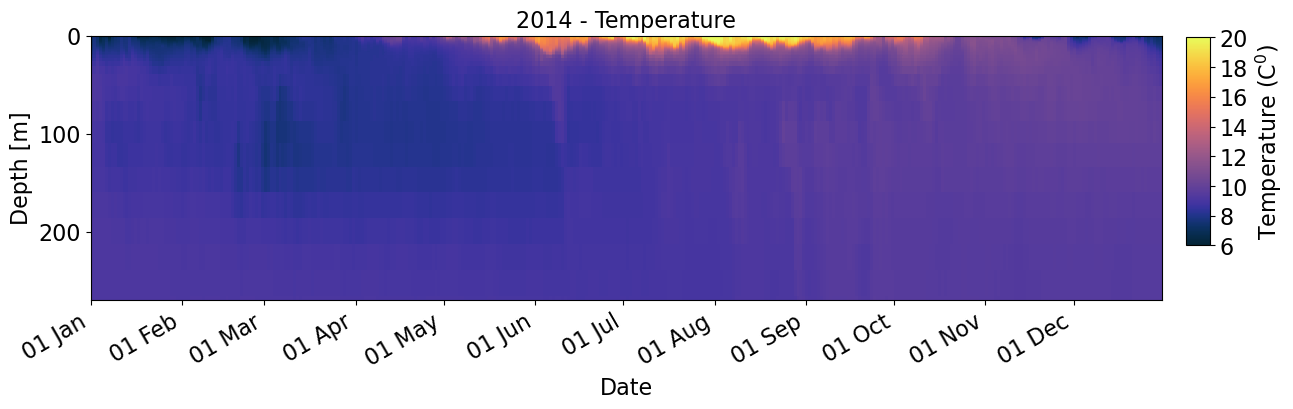

In [9]:
ax=ket.hovmoeller(mod_votemper, mod_depth, tt, (0,270),date_range, title='2014 - Temperature',
               var_title='Temperature (C$^0$)',vmax=20,vmin=6,cmap=cmo.cm.thermal)

In [10]:
bio.close()

In [11]:
%%time
start= dt.datetime(2015,1,1)
end=dt.datetime(2015,12,31) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                 paths        t_0        t_n
0    /results2/SalishSea/nowcast-green.201905/01jan... 2015-01-01 2015-01-02
1    /results2/SalishSea/nowcast-green.201905/02jan... 2015-01-02 2015-01-03
2    /results2/SalishSea/nowcast-green.201905/03jan... 2015-01-03 2015-01-04
3    /results2/SalishSea/nowcast-green.201905/04jan... 2015-01-04 2015-01-05
4    /results2/SalishSea/nowcast-green.201905/05jan... 2015-01-05 2015-01-06
..                                                 ...        ...        ...
359  /results2/SalishSea/nowcast-green.201905/26dec... 2015-12-26 2015-12-27
360  /results2/SalishSea/nowcast-green.201905/27dec... 2015-12-27 2015-12-28
361  /results2/SalishSea/nowcast-green.201905/28dec... 2015-12-28 2015-12-29
362  /results2/SalishSea/nowcast-green.201905/29dec... 2015-12-29 2015-12-30
363  /results2/SalishSea/nowcast-green.201905/30dec... 2015-12-30 2015-12-31

[364 rows x 3 columns]
CPU times: user 39.5 ms, sys: 64.3 ms, total: 104 ms

In [12]:
bio2=xr.open_mfdataset(flist['paths'])

In [13]:
tt2=np.array(bio2.time_counter)
mod_depth2=np.array(bio2.deptht)
mod_votemper2=(bio2.votemper.isel(y=ij,x=ii))

mod_votemper2 = (np.array(mod_votemper2))
mod_votemper2 = np.ma.masked_equal(mod_votemper2,0).T


In [14]:
date_range2=(start,end)

/ocean/ksuchy/MOAD/tools/SalishSeaTools/salishsea_tools/Keegan_eval_tools.py:816: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


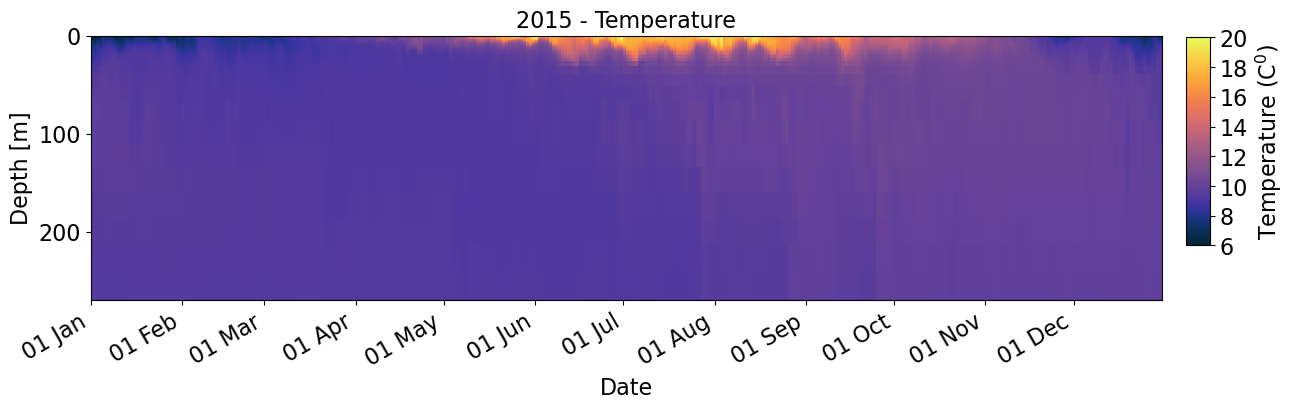

In [15]:
ax=ket.hovmoeller(mod_votemper2, mod_depth2, tt2, (0,270),date_range2, title='2015 - Temperature',
               var_title='Temperature (C$^0$)',vmax=20,vmin=6,cmap=cmo.cm.thermal)

In [16]:
bio2.close()

In [17]:
%%time
start= dt.datetime(2016,1,1)
end=dt.datetime(2016,12,31) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                 paths        t_0        t_n
0    /results2/SalishSea/nowcast-green.201905/01jan... 2016-01-01 2016-01-02
1    /results2/SalishSea/nowcast-green.201905/02jan... 2016-01-02 2016-01-03
2    /results2/SalishSea/nowcast-green.201905/03jan... 2016-01-03 2016-01-04
3    /results2/SalishSea/nowcast-green.201905/04jan... 2016-01-04 2016-01-05
4    /results2/SalishSea/nowcast-green.201905/05jan... 2016-01-05 2016-01-06
..                                                 ...        ...        ...
360  /results2/SalishSea/nowcast-green.201905/26dec... 2016-12-26 2016-12-27
361  /results2/SalishSea/nowcast-green.201905/27dec... 2016-12-27 2016-12-28
362  /results2/SalishSea/nowcast-green.201905/28dec... 2016-12-28 2016-12-29
363  /results2/SalishSea/nowcast-green.201905/29dec... 2016-12-29 2016-12-30
364  /results2/SalishSea/nowcast-green.201905/30dec... 2016-12-30 2016-12-31

[365 rows x 3 columns]
CPU times: user 65.9 ms, sys: 39.7 ms, total: 106 ms

In [18]:
bio3=xr.open_mfdataset(flist['paths'])

In [19]:
tt3=np.array(bio3.time_counter)
mod_depth3=np.array(bio3.deptht)
mod_votemper3=(bio3.votemper.isel(y=ij,x=ii))

mod_votemper3 = (np.array(mod_votemper3))
mod_votemper3 = np.ma.masked_equal(mod_votemper3,0).T


In [20]:
date_range3=(start,end)

/ocean/ksuchy/MOAD/tools/SalishSeaTools/salishsea_tools/Keegan_eval_tools.py:816: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


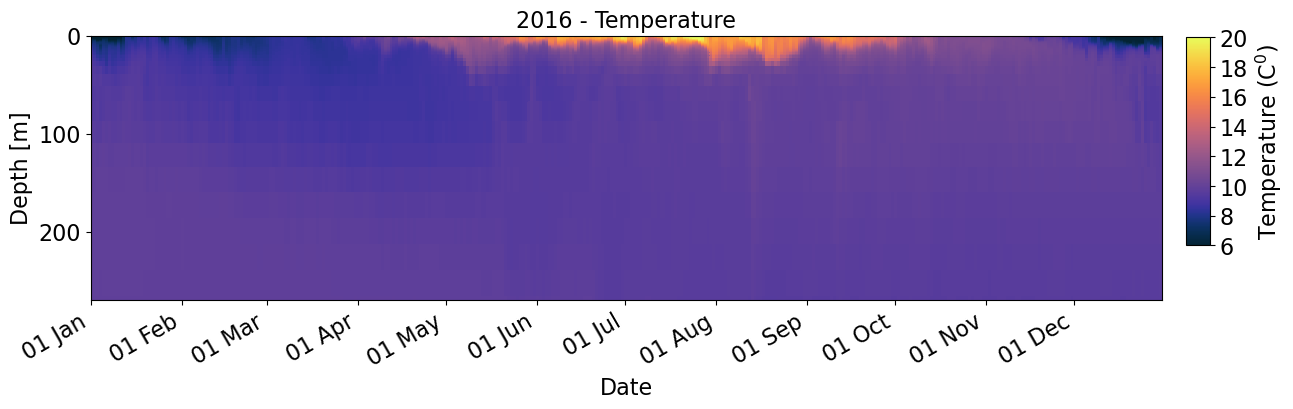

In [21]:
ax=ket.hovmoeller(mod_votemper3, mod_depth3, tt3, (0,270),date_range3, title='2016 - Temperature',
               var_title='Temperature (C$^0$)',vmax=20,vmin=6,cmap=cmo.cm.thermal)

In [22]:
bio3.close()

In [23]:
%%time
start= dt.datetime(2017,1,1)
end=dt.datetime(2017,12,31) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                 paths        t_0        t_n
0    /results2/SalishSea/nowcast-green.201905/01jan... 2017-01-01 2017-01-02
1    /results2/SalishSea/nowcast-green.201905/02jan... 2017-01-02 2017-01-03
2    /results2/SalishSea/nowcast-green.201905/03jan... 2017-01-03 2017-01-04
3    /results2/SalishSea/nowcast-green.201905/04jan... 2017-01-04 2017-01-05
4    /results2/SalishSea/nowcast-green.201905/05jan... 2017-01-05 2017-01-06
..                                                 ...        ...        ...
359  /results2/SalishSea/nowcast-green.201905/26dec... 2017-12-26 2017-12-27
360  /results2/SalishSea/nowcast-green.201905/27dec... 2017-12-27 2017-12-28
361  /results2/SalishSea/nowcast-green.201905/28dec... 2017-12-28 2017-12-29
362  /results2/SalishSea/nowcast-green.201905/29dec... 2017-12-29 2017-12-30
363  /results2/SalishSea/nowcast-green.201905/30dec... 2017-12-30 2017-12-31

[364 rows x 3 columns]
CPU times: user 45 ms, sys: 65.2 ms, total: 110 ms
W

In [24]:
bio4=xr.open_mfdataset(flist['paths'])

In [25]:
tt4=np.array(bio4.time_counter)
mod_depth4=np.array(bio4.deptht)
mod_votemper4=(bio4.votemper.isel(y=ij,x=ii))

mod_votemper4 = (np.array(mod_votemper4))
mod_votemper4 = np.ma.masked_equal(mod_votemper4,0).T


In [26]:
date_range4=(start,end)

/ocean/ksuchy/MOAD/tools/SalishSeaTools/salishsea_tools/Keegan_eval_tools.py:816: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


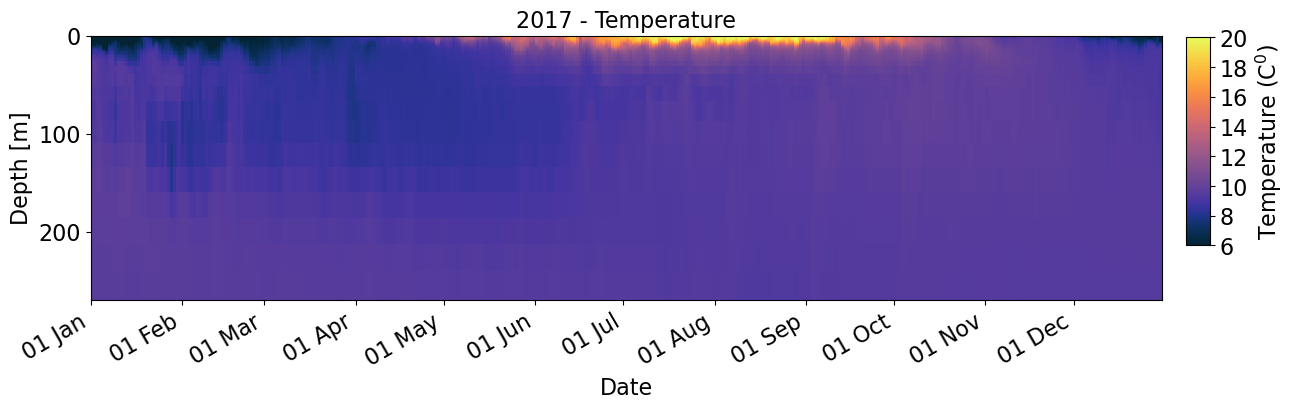

In [27]:
ax=ket.hovmoeller(mod_votemper4, mod_depth4, tt4, (0,270),date_range4, title='2017 - Temperature',
               var_title='Temperature (C$^0$)',vmax=20,vmin=6,cmap=cmo.cm.thermal)

In [28]:
bio4.close()